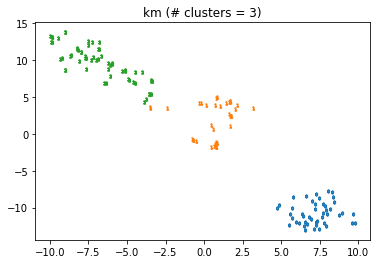

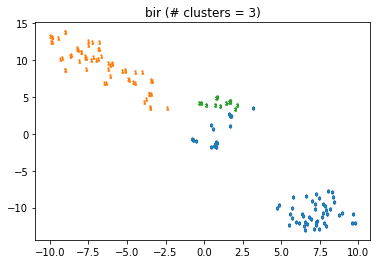

Hooooray!!!!


In [18]:
'''Clustering Algorithm'''
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, mixture, manifold, decomposition, preprocessing
import random
import re
from collections import Counter

def excel(data,cut,name,n_clust,ty):
    kclust={}
    for grp in range(n_clust): # Number of clusters
        kclust[grp]=[]
        for line in data:
            splt=line.split('@')
            if grp==int(splt[1]):
                if cut==0:
                    kclust[grp].append(splt[cut].split('$')[1])
                else:
                    kclust[grp].append(splt[cut])
        kclust[grp].sort()
        kclust[grp]=dict(Counter(kclust[grp])) 
    df_gh=pd.DataFrame(kclust).fillna(0).astype(int)
    df_gh.loc['Total']= df_gh.sum(axis=0)
    df_gh.loc[:,'Total'] = df_gh.sum(axis=1)
    df_gh.to_excel(f'{out_folder}\ML_{name}_{n_clust}_{ty}.xlsx')

def file(name,dff,n_clust):
    try:
        os.mkdir(out_folder)
    except FileExistsError:
        pass
    acc_grp=[]
    for i in range(len(dff.index)):
        acc_grp.append([dff.iloc[i,0],str(dff.iloc[i,1])])
    total=[]
    for k in acc_grp:
        count=0
        for l in gh_acc:
            kk=k[0].split('$')[0]
            if re.search(f'{kk}\D',l[-1]): # Added @ at the end of the accession number for \D
                total.append(k+l)
                count+=1
                break
        if count==0:
            print(k)
    final=[]
    for each_tot in total:
        comb='@'.join(each_tot[:-1])
        final.append(comb)
    no_dup=[]
    for e_final in final:
        if e_final not in no_dup:
            no_dup.append(e_final)
    excel(no_dup,2,name,n_clust,'gh') # 2 = GH family
    excel(no_dup,3,name,n_clust,'org') # 3 = Organism
    excel(no_dup,0,name,n_clust,'prtn') # 0 = Protein name
    
def kmeans(n,rs):
    start = time.time()
    names = 'km'
    kmeans = cluster.KMeans(n_clusters=n,random_state=rs) # Number of clusters
    labels = kmeans.fit_predict(x)
    end = time.time()
    t = round((end-start),3)
    label_save(labels,names,t)
def affinity(n,rs):
    start = time.time()
    names = 'apc'
    apc = cluster.AffinityPropagation(random_state=rs)
    labels = apc.fit_predict(x)
    end = time.time()
    t = round((end-start),3)
    label_save(labels,names,t)
def meanshift(n,rs):
    start = time.time()
    names = 'ms'
    ms = cluster.MeanShift()
    labels = ms.fit_predict(x)
    end = time.time()
    t = round((end-start),3)
    label_save(labels,names,t)
def spectral(n,rs):
    start = time.time()
    names = 'spec'
    spectral = cluster.SpectralClustering(n_clusters=n,assign_labels="discretize",random_state=rs) # Number of clusters
    labels = spectral.fit_predict(x)
    end = time.time()
    t = round((end-start),3)
    label_save(labels,names,t)
def agglomerative(n,rs):
    start = time.time()
    names = 'agglo'
    agglo = cluster.AgglomerativeClustering(n_clusters=n) # Number of clusters
    labels = agglo.fit_predict(x)
    end = time.time()
    t = round((end-start),3)
    label_save(labels,names,t)
def dbscan(n,rs):
    start = time.time()
    names = 'dbs'
    new_x=preprocessing.StandardScaler().fit_transform(x)
    dbs = cluster.DBSCAN()
    labels = dbs.fit_predict(new_x)
    end = time.time()
    t = round((end-start),3)
    label_save(labels,names,t)
def optics(n,rs):
    start = time.time()
    names = 'opt'
    opt = cluster.OPTICS()
    labels = opt.fit_predict(x)
    end = time.time()
    t = round((end-start),3)
    label_save(labels,names,t)
def gaussian(n,rs):
    start = time.time()
    names = 'gm'
    gm = mixture.GaussianMixture(n_components=n,random_state=rs) # Number of Clusters
    labels = gm.fit_predict(x)
    end = time.time()
    t = round((end-start),3)
    label_save(labels,names,t)
def birch(n,rs):
    start = time.time()
    names = 'bir'
    brc = cluster.Birch() # Number of clusters
    labels = brc.fit_predict(x)
    end = time.time()
    t = round((end-start),3)
    label_save(labels,names,t)

def label_save(label,name,t):
    dfout = pd.DataFrame({'Accession': df.iloc[:,0],  'Group': label})
    try:
        os.mkdir(folder)
    except FileExistsError:
        pass
#     dfout.to_csv(f'{folder}\ML_{name}_{len(set(label))}.txt',sep='\t', index=False)
#     pca_(label,name,t) # Disable the PCA graph
    tsne_(label,name,t)
    file(name,dfout,len(set(label)))
    
def pca_(label,name,t):
    pca = decomposition.PCA(n_components=2, random_state=42)
    pca_diff=pca.fit(x)
    pca_axis = pca.fit_transform(x)
    graph(pca_axis,label,name,'pca',t)
#     print(pca_diff.explained_variance_ratio_)

def tsne_(label,name,t):
    tsne = manifold.TSNE(n_components=2, random_state=42)
    tsne_axis = tsne.fit_transform(x)
    graph(tsne_axis, label,name,'tsne',t)
    
def graph(axis,label,name,types,t):
    df_graph = pd.DataFrame({'X': axis[:, 0], 'Y': axis[:, 1], 'L': label})
    marker={0:'$0$',1:'$1$',2:'$2$',3:'$3$',4:'$4$',5:'$5$',6:'$6$',7:'$7$',8:'$8$',9:'$9$'}
    n_clust=set(label)
    lock=-1
    for each in n_clust:
#         lock=random.randint(0,12)
        lock+=1
        if lock>len(marker)-1:
            lock = 0
        newdf = df_graph.loc[df_graph.loc[:, "L"] == each, :]
        plt.scatter(np.array(newdf.X), np.array(newdf.Y), 10, label=each, marker=marker[lock])
        plt.title(f'{name} (# clusters = {len(n_clust)})')
    plt.savefig(f'{folder}\ML_{name}_{len(n_clust)}_{types}.png',dpi=300)
    plt.show()
    plt.close()
#     print('Number of Clusters:',len(n_clust))

# CAZy data file
gh_acc=[]
with open('cazy_ec_17.txt','r') as ec_inpt:
    for j in ec_inpt:
        j_split=j.rstrip().split('$')
        lis=[j_split[0],j_split[1],j_split[-1]+'@']
        gh_acc.append(lis)
        
# Feature of the sequence
df = pd.read_csv('test.txt', sep='\t',header=None)# input file which contains features, header=None if no column title
x=df.iloc[:,1:].values
# x=x*100 # Scaling of the values
folder='prottrans_test'
out_folder=f'{folder}/tables'
n = 2
rs = 42
kmeans(3,rs)
# affinity(n,rs)   # placebo parameters
# meanshift(n,rs)  # placebo parameters
# spectral(3,rs)   # Optimal number of clusters [ 2  1  3  4 40 46  6 58  7 64]
# agglomerative(3,rs) # 2 was obtained, but took 3
# dbscan(n,rs)     # placebo parameters
# optics(n,rs)     # placebo parameters
# gaussian(3,rs)
birch(3,rs)
print('Hooooray!!!!')

In [1]:
import pandas as pd
df = pd.read_csv('test.txt', sep='\t',header=None)# input file which contains features, header=None if no column title
x=df.iloc[:,1:].values

In [2]:
df

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,AHN09799.1$g,0.042193,-0.007031,0.015166,0.023656,0.017237,0.000793,-0.001609,0.011158,-0.009513,...,0.020587,0.005823,-0.018919,0.003165,0.011632,0.011449,-0.001754,0.022865,0.014952,-0.011608
1,AFJ15537.1$g,0.006869,-0.007746,0.013943,0.028900,-0.000858,0.030183,0.000005,-0.020660,0.002976,...,0.040643,-0.060845,0.003206,-0.025196,-0.027487,0.035412,-0.003006,0.021173,-0.011562,0.002034
2,ACI67904.1$g,0.009200,-0.017087,0.026758,0.022599,0.012350,0.003898,-0.006414,0.012439,-0.010491,...,0.040290,-0.024609,0.000425,-0.017889,-0.026852,0.032382,0.016068,0.007914,0.015808,-0.011240
3,ACB20805.1$g,-0.025149,-0.017428,0.020407,0.031033,0.004783,-0.004693,-0.000786,-0.002672,-0.017435,...,0.057252,-0.057571,-0.014539,-0.013837,-0.031028,0.033124,0.013161,0.019372,0.011788,-0.001752
4,ABB53641.1$g,0.015720,-0.000078,0.013846,0.022059,0.033608,0.015715,0.002805,-0.019079,-0.004459,...,0.043575,-0.034777,0.001548,-0.013279,-0.004218,0.006110,0.005441,0.028813,0.010971,-0.012768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,QNJ46244.1$ch,-0.003937,-0.024735,0.029590,-0.001141,0.071525,0.017036,0.009416,-0.041695,0.006621,...,0.000811,-0.025648,-0.032542,-0.004314,-0.017410,0.034374,-0.009221,0.054655,-0.001750,0.000454
139,QNJ46255.1$ch,-0.012176,-0.014879,0.024253,-0.006522,0.062809,0.022623,0.005234,-0.046998,0.003232,...,-0.003030,-0.029009,-0.029877,-0.005910,-0.026252,0.031553,-0.007508,0.043973,-0.006899,-0.000491
140,QNJ46231.1$ch,0.033996,0.008201,0.006066,0.003543,0.051539,0.033783,0.005393,-0.014681,-0.010085,...,0.027627,-0.019529,-0.010831,-0.036915,-0.002423,0.012895,0.015216,0.028288,0.002938,-0.022403
141,QNJ46219.1$ch,-0.001851,-0.027277,0.022259,0.006502,0.069585,0.002474,0.013181,-0.040448,0.010601,...,0.002538,-0.032337,-0.022915,-0.010991,-0.021092,0.026343,-0.001886,0.045303,-0.004636,0.001385


In [2]:
gh_acc=[]
with open('cazy_ec_17.txt','r') as ec_inpt:
    for j in ec_inpt:
        j_split=j.rstrip().split('$')
        lis=[j_split[0],j_split[1],j_split[-1]+'@']
        print(lis)
        gh_acc.append(lis)

['GH0', 'Bacteria', '@']
['GH0', 'Bacteria', 'CAA90860.1 CCC82852.1@']
['GH0', 'Bacteria', 'AEL74928.1@']
['GH0', 'Bacteria', 'CAA63438.1@']
['GH0', 'Viruses', 'AAC00558.1@']
['GH1', 'Eukaryota', 'AAF22295.1 AAG21562.1 AAG51546.1 AAK63959.1 AAL08271.1 AAN18084.1 AAN31804.1 AAN60329.1 AEE32799.1 AEE32800.1 AEE32801.1 BAD94819.1 CAC19786.1 CBG20990.1 CBG21227.1 CBG21235.1 CBG21246.1 NP_175649.1@']
['GH7', 'Eukaryota', 'CAM98445.1@']
['GH7', 'Eukaryota', 'CAM98446.1@']
['GH7', 'Eukaryota', 'BAA25183.1@']
['GH7', 'Eukaryota', 'EAW16381.1 XP_001258278.1@']
['GH7', 'Eukaryota', 'AAM54070.1@']
['GH7', 'Eukaryota', 'EAA66593.1@']
['GH7', 'Eukaryota', 'AAF04492.1 AAP66264.1 CAK44068.1@']
['GH7', 'Eukaryota', 'AAF04491.1 AAP66263.1 AAR79028.1 CAK39699.1@']
['GH7', 'Eukaryota', 'BAC81967.1@']
['GH7', 'Eukaryota', 'CAM98448.1@']
['GH7', 'Eukaryota', 'AAW64926.1 AGY80096.1@']
['GH7', 'Eukaryota', 'AAY89412.2 ABN13116.1@']
['GH7', 'Eukaryota', 'AAQ38146.1 ACH15004.1 ACH15013.1@']
['GH7', 'Eukaryota'